<a href="https://colab.research.google.com/github/AlfredoJc-cyber/ProyectoFinal_DataScienceI/blob/main/ProyectoParteIII%2BJasaui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------
##***PROYECTO FINAL:*** **ANÁLISIS PREDICTIVO DE ANSIEDAD SOCIAL**

--------------------------------------------------------------------------------

***Estudiante:***  ALFREDO JASAUI CHERO

***Escuela:*** CODERHOUSE

***Curso:*** DATA SCIENCE I

***Comisión:*** 67465

***Profesor:*** JUAN CRUZ ALRIC CORTABARRIA

***Tutor:*** LUCIANO LISACHI

--------------------------------------------------------------------------------
##***CONTENIDOS***

--------------------------------------------------------------------------------
1.  **Contexto:** Introducción al panorama que rodea al proyecto
2.  **Objetivo:** Definición del objetivo del proyecto
3.  **Importación de Librerías:** Carga de las herramientas necesarias
4.  **Importación de Datos:** Carga del dataset
5.  **Hipótesis:** Planteamiento de la hipótesis
6.  **Análisis Exploratorio de Datos (EDA):** Comprensión de  los datos, distribuciones, valores perdidos y relaciones
7.  **Feature Engineering:** Adición de variables de valor al dataset
8.  **Preprocesamiento de Datos:** Preparación de datos para el modelo
9.  **División de Datos:** Separación de datos en conjuntos de entrenamiento y prueba
10.  **Construcción y Entrenamiento del Modelo:** Aplicación del modelo de regresión RandomForestRegressor
11. **Validación del Modelo:** Medición del rendimiento del modelo bajo el cálculo de métricas adecuadas para regresión
12. **Análisis de Importancia de Características:** Identificación de las variables más influyentes al predecir la variable objetivo
13. **Conclusiones:** Interpetación de resultados obtenidos, incluyendo la Validación o refutación de la hipótesis

## **1. Contexto**

La ansiedad social afecta a millones de personas en el mundo y representa un desafío creciente en materia de salud mental. En un contexto donde la atención temprana y la prevención son cada vez más valoradas, contar con herramientas para identificar factores de riesgo y patrones puede aportar valor tanto para instituciones de salud como para investigadores y desarrolladores de tecnología aplicada.

La disponibilidad de data sobre ansiedad social incluso abre oportunidades para generar modelos descriptivos y predictivos, generando beneficios tanto sociales, desde el lado de los pacientes; como comerciales, desde el lado de los profesionales, académicos y funcionarios públicos dedicados a la salud mental.

## **2. Objetivo**

El objetivo del presente proyecto consiste en construir un modelo de Machine Learning capaz de predecir el nivel de ansiedad de una persona en base a un conjunto de atributos. Esta es una tarea de regresión, ya que la variable objetivo **('Anxiety Level (1-10)')** es numérica, discreta y ordenada. El modelo a construir está basado en Random Forest.

## **3. Importación de Librerías**

In [ ]:
# Importar librerías para la manipulación, análisis y visualización de datos; incluyendo funciones estadísticas, matemática avanzada, modelado y aprendizaje automático
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## **4. Importación de Datos**

In [ ]:
# Cargar el dataset desde la URL
url = 'https://raw.githubusercontent.com/AlfredoJc-cyber/ProyectoFinal_DataScienceI/refs/heads/main/enhanced_anxiety_dataset.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas para verificar la carga
df.head()

,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


## **4. Hipótesis**

#### **Hipótesis Nula (H0)**: Las características disponibles no son suficientes para predecir el nivel de ansiedad de una persona, teniendo un rendimiento de modelo significativamente mejor que el de un modelo base. Se esperaría un R² cercano a 0.

#### **Hipótesis Alternativa (H1)**: Es posible construir un modelo de regresión basado en Random Forest utilizando las características disponibles para predecir el nivel de ansiedad de una persona, alcanzando un coeficiente de determinación (R²) significativamente mayor a 0, idealmente mayor a 0.5, y un Error Absoluto Medio (MAE) razonablemente bajo, lo que indicaría una capacidad predictiva útil del modelo.

## **5. Análisis Exploratorio de Datos (EDA)**

### **5.1. Comprensión de las Variables**

**5.1.1. Descripción de las Variables**

**Age:** Edad

**Gender:** Género (masculino, femenino u otro)

**Sleep hours:** Horas de sueño diarias

**Physical activity (hrs/week):** Actividad física (en horas por semana)

**Caffeine intake (mg/day):** Ingesta de cafeína (en miligramos diarios)

**Alcohol consumption (drinks/week):** Consumo de alcohol (en bebidas por semana)

**Smoking:** Fumador (sí o no)

**Diet quality (1-10):** Calidad de la dieta (del 1 al 10)

**Stress level (1-10):** Nivel de estrés (del 1 al 10)

**Heart rate (bpm):** Frecuencia cardíaca (en latidos por minuto)

**Breathing rate (breaths/min):** Frecuencia respiratoria (en respiraciones por minuto)

**Sweating level (1-5):** Nivel de sudoración (del 1 al 5)

**Dizziness:** Sufre de mareos (sí o no)

**Family history of anxiety:** Historial de ansiedad en la familia (sí o no)

**Medication:** Uso de medicación (sí o no)

**Therapy sessions (per month):** Número de sesiones de terapia (al mes)

**Recent major life event:** Evento personal importante reciente (sí o no)

**Anxiety level (1-10):** Nivel de ansiedad (del 1 al 10)

**5.1.2. Información General del Dataset**

In [ ]:
# Número de filas, número de columnas, nombres de las variables, tipos de datos de las variables
df.info()
#Donde:
  #int64: Numérico (Entero)
  #float64: Numérico (Decimal)
  #object: Categórico (Cadena de texto u otro valor no numérico)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                999 non-null    int64  
 1   Gender                             999 non-null    object 
 2   Sleep Hours                        999 non-null    float64
 3   Physical Activity (hrs/week)       999 non-null    float64
 4   Caffeine Intake (mg/day)           999 non-null    int64  
 5   Alcohol Consumption (drinks/week)  999 non-null    int64  
 6   Smoking                            999 non-null    object 
 7   Family History of Anxiety          999 non-null    object 
 8   Stress Level (1-10)                999 non-null    int64  
 9   Heart Rate (bpm)                   999 non-null    int64  
 10  Breathing Rate (breaths/min)       999 non-null    int64  
 11  Sweating Level (1-5)               999 non-null    int64  

**5.1.3. Análisis Descriptivo por Variable**

In [ ]:
#Conteos, medias, desviaciones estándar, valores mínimos, primeros cuartiles (25%), medianas, terceros cuartiles (75%) y valores máximos
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,39.842843,6.599800,2.881481,291.180180,10.060060,5.814815,89.814815,20.783784,3.127127,2.453453,5.197197,3.972973
std,12.883800,1.258112,1.811422,148.440509,5.752441,2.914744,17.565815,5.067806,1.389502,2.208924,2.876926,2.176636
min,18.000000,2.500000,0.000000,2.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.800000,1.400000,171.000000,6.000000,3.000000,75.000000,16.000000,2.000000,1.000000,3.000000,2.000000
50%,39.000000,6.700000,2.700000,276.000000,10.000000,6.000000,90.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,50.500000,7.500000,4.100000,391.000000,15.000000,8.000000,105.500000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,9.900000,9.900000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,9.000000,10.000000,10.000000


### **5.2. Revisión de valores perdidos**

In [ ]:
missing_values = df.isnull().sum()
print("Valores perdidos por columna:")
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("\nNo existen valores perdidos en el dataset.")

Valores perdidos por columna:
Series([], dtype: int64)

No existen valores perdidos en el dataset.


### **5.3. Distribución de la variable objetivo ('Anxiety Level (1-10)')**

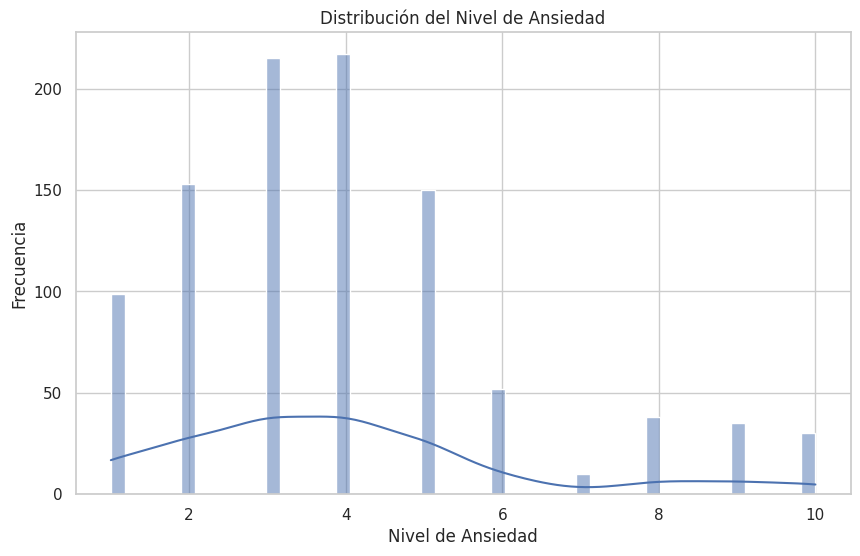

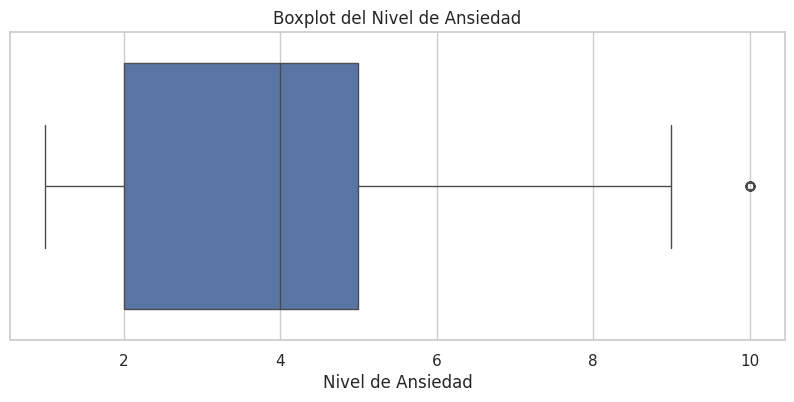

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Anxiety Level (1-10)'], kde=True, bins=50)
plt.title('Distribución del Nivel de Ansiedad')
plt.xlabel('Nivel de Ansiedad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Anxiety Level (1-10)'])
plt.title('Boxplot del Nivel de Ansiedad')
plt.xlabel('Nivel de Ansiedad')
plt.show()

**Observaciones:** Se puede apreciar que la mayoría de personas presentan niveles de ansiedad entre 2 y 5. De la misma forma, la distribución está ligeramente sesgada hacia niveles elevados.

### **5.4. Análisis de variables/características numéricas**

Características Numéricas: ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)', 'Diet Quality (1-10)', 'Anxiety Level (1-10)']


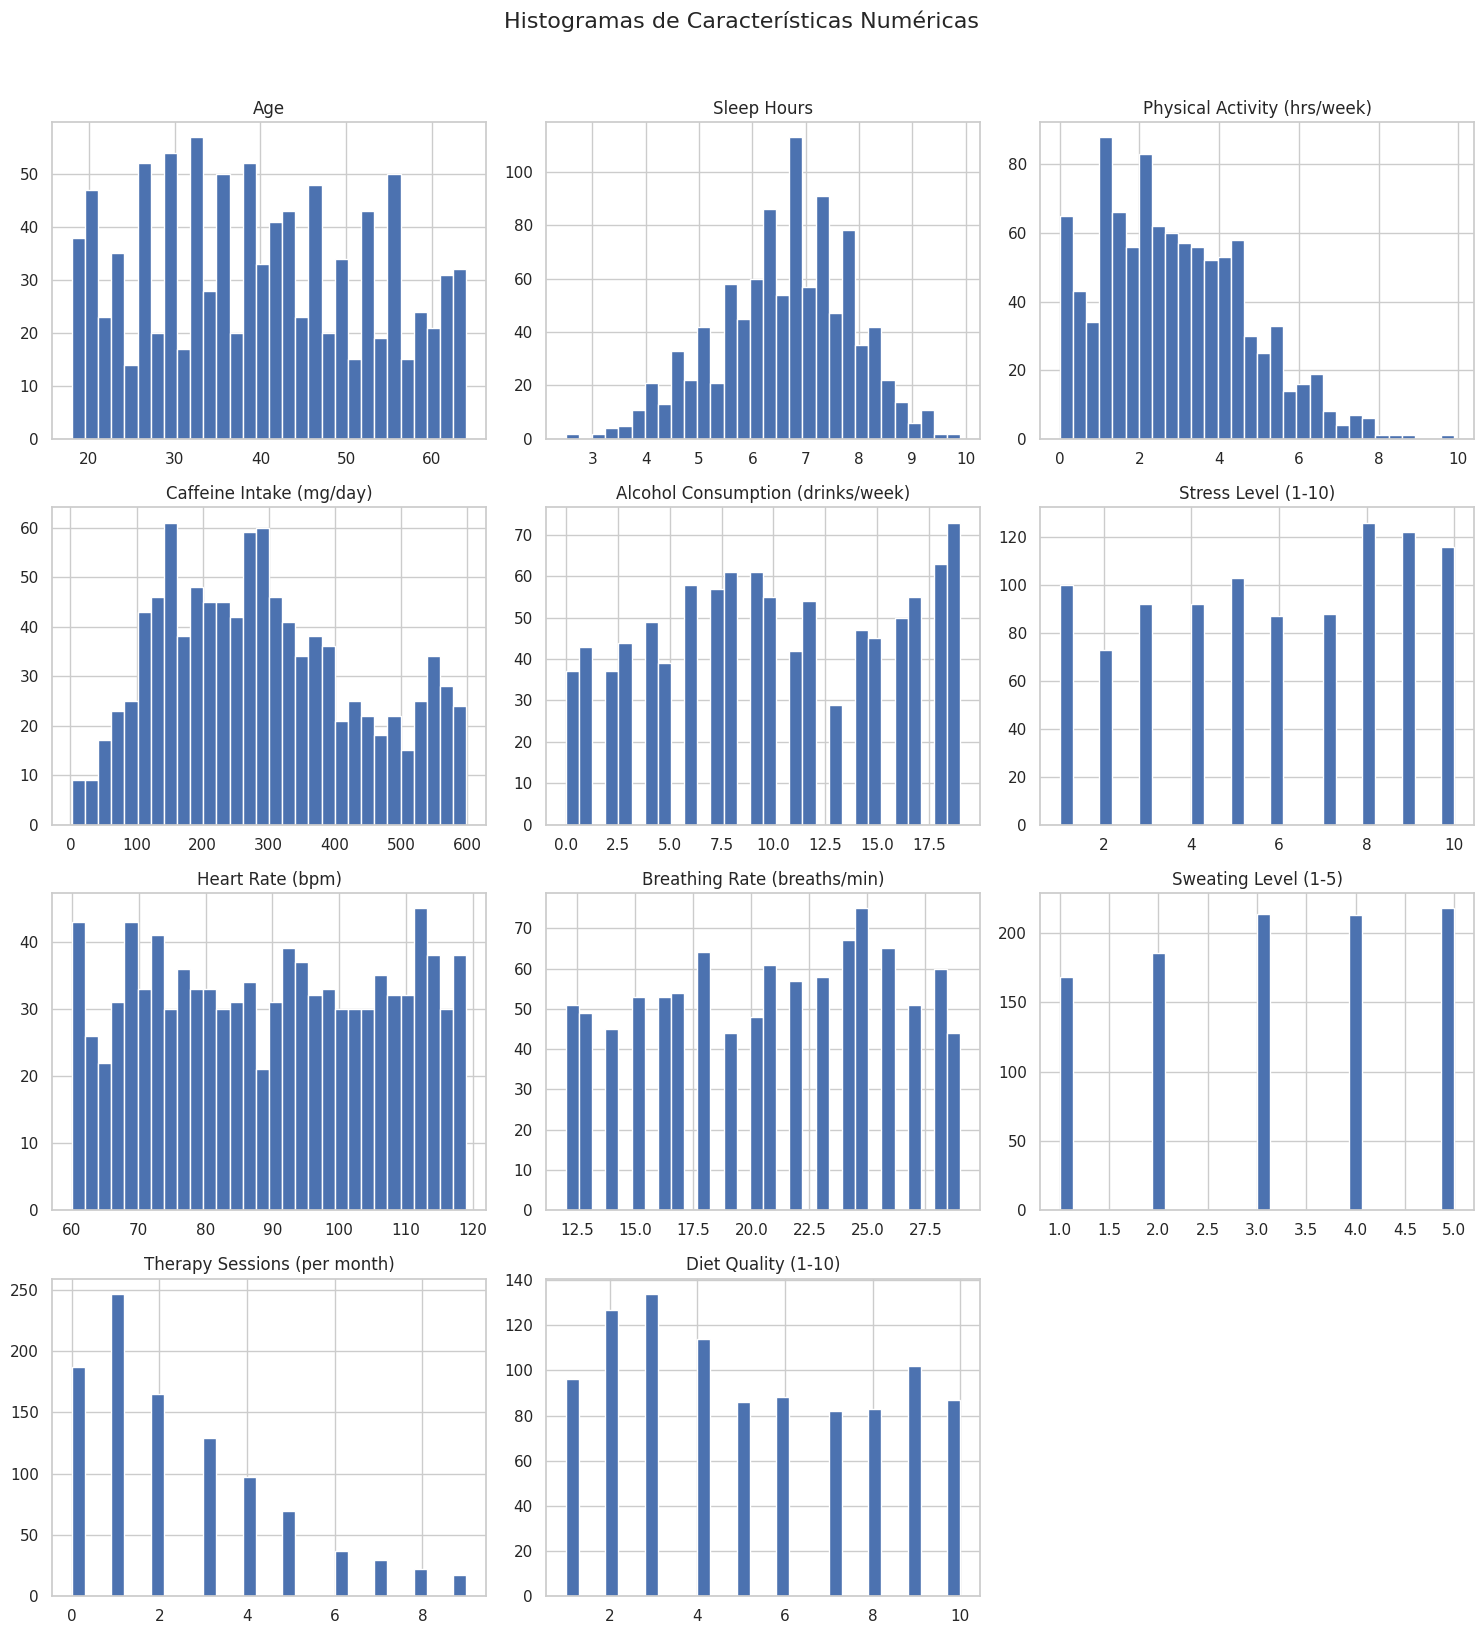

In [ ]:
# Seleccionar variables numéricas
numerical_df = df.select_dtypes(include='number')
numerical_features = numerical_df.columns.tolist()

# Excluir la variable objetivo porque ya se analizó antes
column_to_exclude = 'Anxiety Level (1-10)'
if column_to_exclude in numerical_df.columns:
    numerical_df = numerical_df.drop(columns=[column_to_exclude])

print(f"Características Numéricas: {numerical_features}")

# Configurar el lienzo donde irán los histogramas
n_features = len(numerical_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Dibujar histogramas
numerical_df.hist(figsize=(5 * n_cols, 4 * n_rows), bins=30, layout=(n_rows, n_cols))
plt.suptitle('Histogramas de Características Numéricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

###**5.5. Análisis de variables/características categóricas**

Características Categóricas: ['Gender', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']


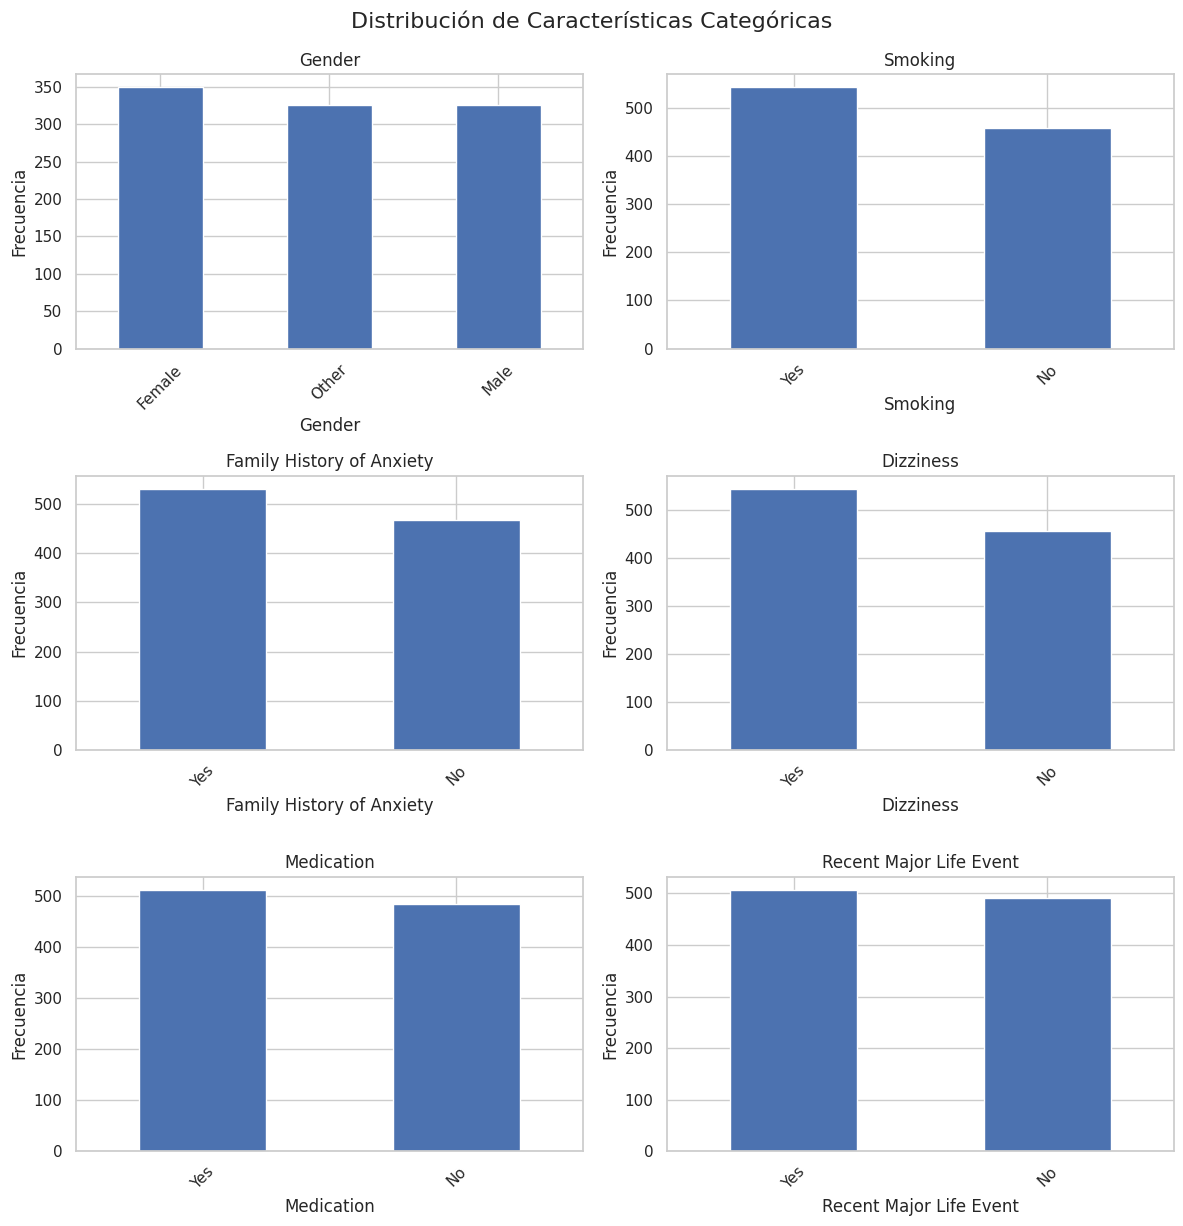

In [ ]:
# Seleccionar variables categóricas
categorical_df = df.select_dtypes(exclude='number')
categorical_features = categorical_df.columns.tolist()

print(f"Características Categóricas: {categorical_features}")

# Configurar el lienzo donde irán los histogramas
n_features = len(categorical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Graficar cada variable categórica como gráfico de barras
for i, col in enumerate(categorical_features):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si hay menos variables que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribución de Características Categóricas', fontsize=16, y=1.02)
plt.show()

### **5.6. Matriz de Correlación**

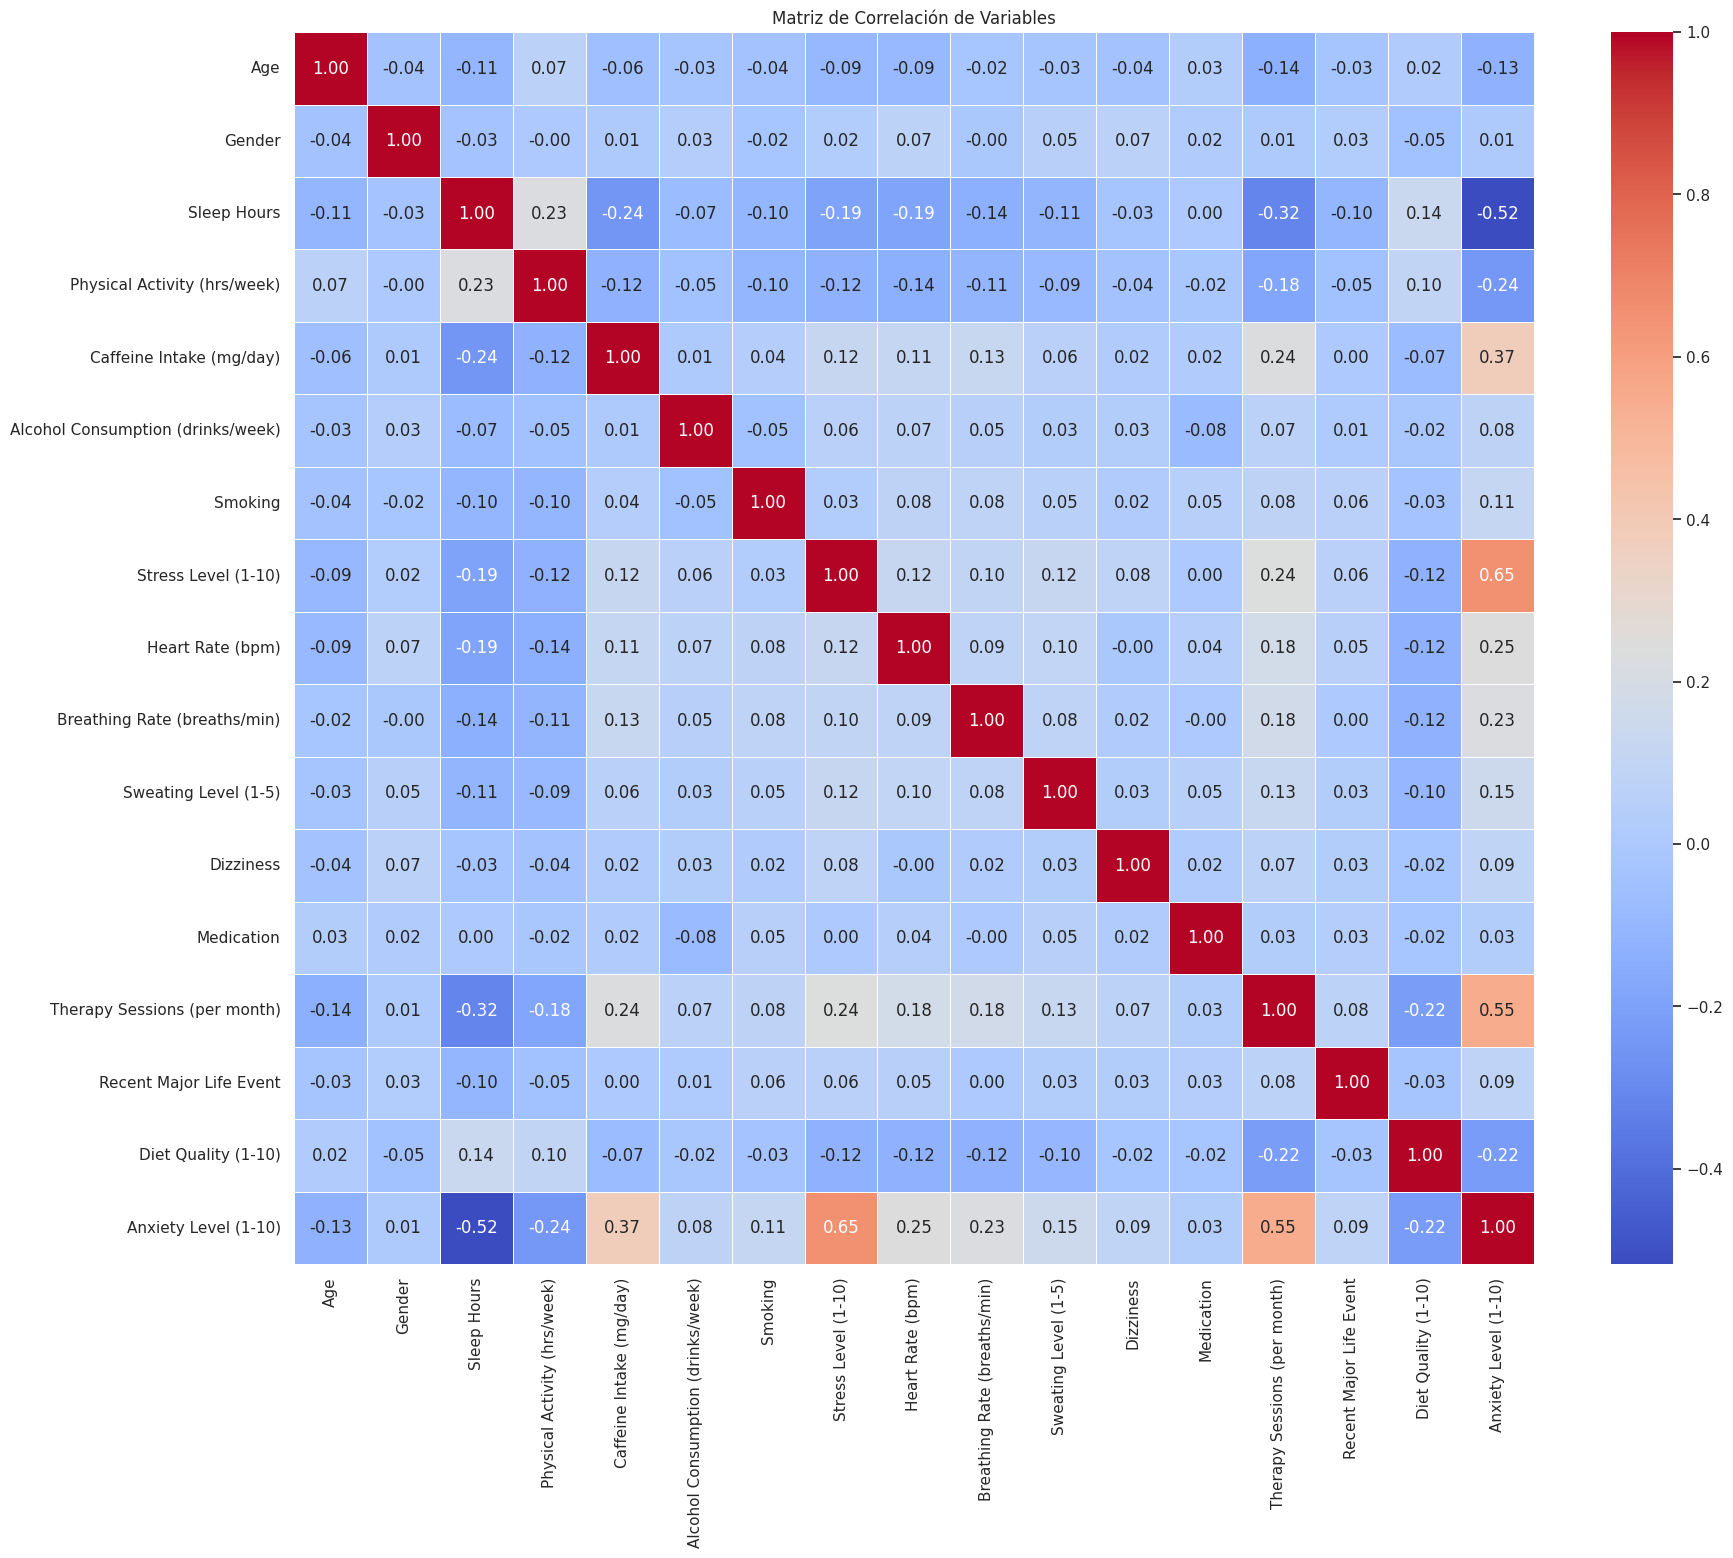


Correlaciones con la variable 'Anxiety Level (1-10)':
Anxiety Level (1-10)                 1.000000
Stress Level (1-10)                  0.652753
Therapy Sessions (per month)         0.548983
Caffeine Intake (mg/day)             0.373950
Heart Rate (bpm)                     0.246266
Breathing Rate (breaths/min)         0.225927
Sweating Level (1-5)                 0.150223
Smoking                              0.111429
Dizziness                            0.093040
Recent Major Life Event              0.085317
Alcohol Consumption (drinks/week)    0.079516
Medication                           0.033016
Gender                               0.009689
Age                                 -0.126030
Diet Quality (1-10)                 -0.224446
Physical Activity (hrs/week)        -0.240081
Sleep Hours                         -0.517240
Name: Anxiety Level (1-10), dtype: float64


In [ ]:
# Convertir las variables categóricas a valores numéricos
categorical_columns = ["Smoking", "Dizziness", "Medication", "Recent Major Life Event", "Gender"]

# Mapeo personalizado
mapping = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}

for column in categorical_columns:
    if df[column].dtype == "object":
        df[column] = df[column].map(mapping)

for column in categorical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # 'coerce' convierte errores a NaN

df_numeric = df.select_dtypes(include=['number'])

#Generar la matriz de correlación
correlation_matrix = df_numeric.corr()

#Visualizar la matriz de correlación con heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

#Mostrar correlaciones con la variable 'Anxiety Level (1-10)'
print("\nCorrelaciones con la variable 'Anxiety Level (1-10)':")
if 'Anxiety Level (1-10)' in correlation_matrix.columns:
    print(correlation_matrix['Anxiety Level (1-10)'].sort_values(ascending=False))
else:
    print("La columna 'Anxiety Level (1-10)' no es numérica o no existe en el DataFrame.")

**Observaciones:** Se puede apreciar que el Nivel de Estrés tiene la correlación positiva más alta con el Nivel de Ansiedad. Por otro lado, las Horas de Sueño tienen la correlación negativa más alta.

## **6. Feature Engineering**

In [ ]:
# 1. Primera Nueva Característica: Physiological Arousal Index (Índice de Estimulación Fisiológica)

# 1.1. Seleccionar las columnas fisiológicas
fisiologicas = ['Heart Rate (bpm)',
                'Breathing Rate (breaths/min)',
                'Sweating Level (1-5)']

# 1.2. Estandarizar las columnas: Esto transforma cada columna/variable para que tenga media 0 y desviación estándar 1, permitiendo compararlas en una misma escala, ya que tienen unidades distintas
scaler = StandardScaler()
fisiologicas_std = scaler.fit_transform(df[fisiologicas])

# 1.3. Crear la nueva variable sumando las columnas estandarizadas
df['Physiological Arousal Index'] = fisiologicas_std.sum(axis=1)

# ------------------------------
# 2. Segunda Nueva Característica: Total Stimulant Consumption (Consumo Total de Estimulantes)

# 2.1. Escalar el alcohol para que tenga una magnitud comparable a la cafeína
alcohol_factor = 14  # un vaso de bebida alcohólica puede contener hasta 14 mg de alcohol según la OMS (Organización Mundial de la Salud) y el  NIAAA (National Institute on Alcohol Abuse and Alcoholism)
df['Total Stimulant Consumption'] = df['Caffeine Intake (mg/day)'] + (df['Alcohol Consumption (drinks/week)'] * alcohol_factor)

# 2.2 Visualizar las nuevas  variables en el dataset
print(df[['Physiological Arousal Index', 'Total Stimulant Consumption']].head())

   Physiological Arousal Index  Total Stimulant Consumption
0                     0.666754                          321
1                    -1.958304                          312
2                     1.400614                          173
3                    -1.055824                          444
4                     0.742552                          303


## **7. Preprocesamiento de Datos**

In [ ]:
# Definir las características (en el eje X) y la variable objetivo (en el eje Y)
X = df.drop('Anxiety Level (1-10)', axis=1)
y = df['Anxiety Level (1-10)']
categorical_features_for_encoding = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features_for_scaling = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_features_for_encoding).tolist()

In [ ]:
# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough'  # O 'drop'
)

## **8. División de Datos**

In [ ]:
# Dividir los datos previa aplicación del preprocesamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (799, 19)
Tamaño del conjunto de prueba (X_test): (200, 19)
Tamaño del conjunto de entrenamiento (y_train): (799,)
Tamaño del conjunto de prueba (y_test): (200,)


## **9. Construcción y Entrenamiento del Modelo**

In [ ]:
# Crear el pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor
      (n_estimators=100, # Refiere al número de árboles. 100 es un buen inicio ya que generalmente da buenos resultados sin requerir demasiado tiempo ni costo de cómputo
       random_state=42,  # Para asegurar reproducibilidad de los resultados
       n_jobs=-1,        # Usa todos los procesadores disponibles para entrenar más rápido
       max_depth=10,     # Profundidad máxima de los árboles. Ayuda a prevenir overfitting, al evitar que los árboles se ajusten demasiado a los datos de entrenamiento
       min_samples_split=5) #Número mínimo de muestras para dividir un nodo. Si es alto, los árboles serán más conservadores y menos complejos
      )
])

In [ ]:
# Entrenar el pipeline completo
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Alcohol Consumption '
                                                   '(drinks/week)',
                                                   'Breathing Rate '
                                                   '(breaths/min)',
                                                   'Caffeine Intake (mg/day)',
                                                   'Diet Quality (1-10)',
                                                   'Dizziness', 'Gender',
                                                   'Heart Rate (bpm)',
                                                   'Medication',
                                                   'Physical Activity '
                                                   '(hrs/week)',
                                                   'Physiological Arousal '
                                                   'Index',
                                                   'Recent Major Life Event',
                                                   'Sleep Hours', 'Smoking',
                                                   'Stress Level (1-10)',
                                                   'Sweating Level (1-5)',
                                                   'Therapy Sessions (per '
                                                   'month)',
                                                   'Total Stimulant '
                                                   'Consumption']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Family History of '
                                                   'Anxiety'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_jobs=-1, random_state=42))])

## **10. Validación del Modelo**

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model_pipeline.predict(X_test)

### **10.1. Métricas de Regresión**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Métricas de Evaluación del Modelo de Regresión ---")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

print("\nInterpretación:")
print(f"- MAE: Las predicciones del modelo se desvían en promedio, en {round(mae,4)} puntos.")
print(f"- RMSE: La desviación típica de los errores es de {round(rmse,4)}")
print(f"- R²: El {r2*100:.2f}% de la varianza en los niveles de ansiedad puede ser explicada por las características del modelo.")

--- Métricas de Evaluación del Modelo de Regresión ---
Error Absoluto Medio (MAE): 0.9441
Error Cuadrático Medio (MSE): 1.3696
Raíz del Error Cuadrático Medio (RMSE): 1.1703
Coeficiente de Determinación (R²): 0.7376

Interpretación:
- MAE: Las predicciones del modelo se desvían en promedio, en 0.9441 puntos.
- RMSE: La desviación típica de los errores es de 1.1703
- R²: El 73.76% de la varianza en los niveles de ansiedad puede ser explicada por las características del modelo.


### **10.2. Gráfico de Predicciones vs Valores Reales**

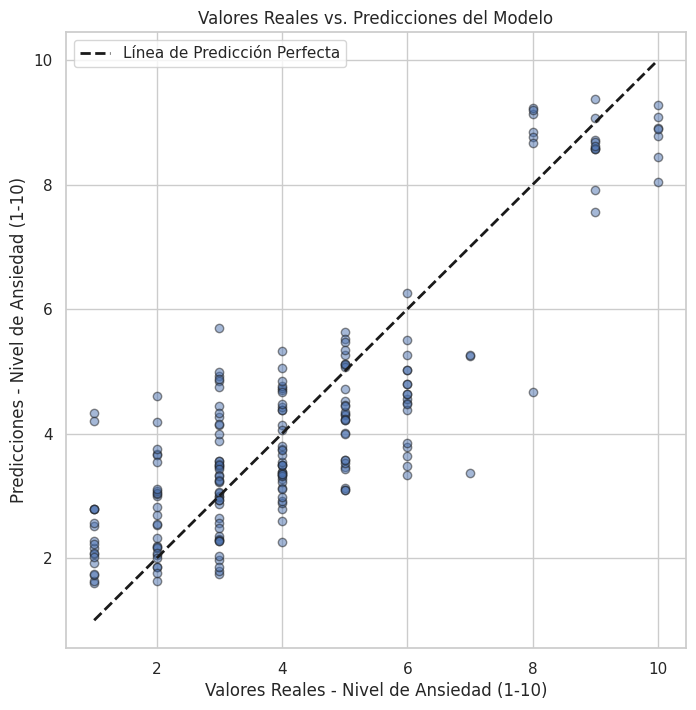

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de Predicción Perfecta')
plt.xlabel('Valores Reales - Nivel de Ansiedad (1-10)')
plt.ylabel('Predicciones - Nivel de Ansiedad (1-10)')
plt.title('Valores Reales vs. Predicciones del Modelo')
plt.legend()
plt.grid(True)
plt.show()

**Observaciones**: La mayoría de puntos están ubicados cerca de la línea de predicción perfecta, lo que sugiere que el modelo funciona razonablemente bien. Por otro lado, el modelo cuenta con mayor dispersión o sesgo a partir de niveles de ansiedad entre 5 y 7.

## **11. Análisis de Importancia de Características**

Importancia de las características según Random Forest Regressor:
                              Feature  Importance
14                Stress Level (1-10)    0.489277
12                        Sleep Hours    0.249053
16       Therapy Sessions (per month)    0.070670
3            Caffeine Intake (mg/day)    0.026034
9        Physical Activity (hrs/week)    0.025203
17        Total Stimulant Consumption    0.024663
10        Physiological Arousal Index    0.020287
0                                 Age    0.017601
7                    Heart Rate (bpm)    0.014887
1   Alcohol Consumption (drinks/week)    0.014701


<ipython-input-44-ebfbdfbcdf0d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


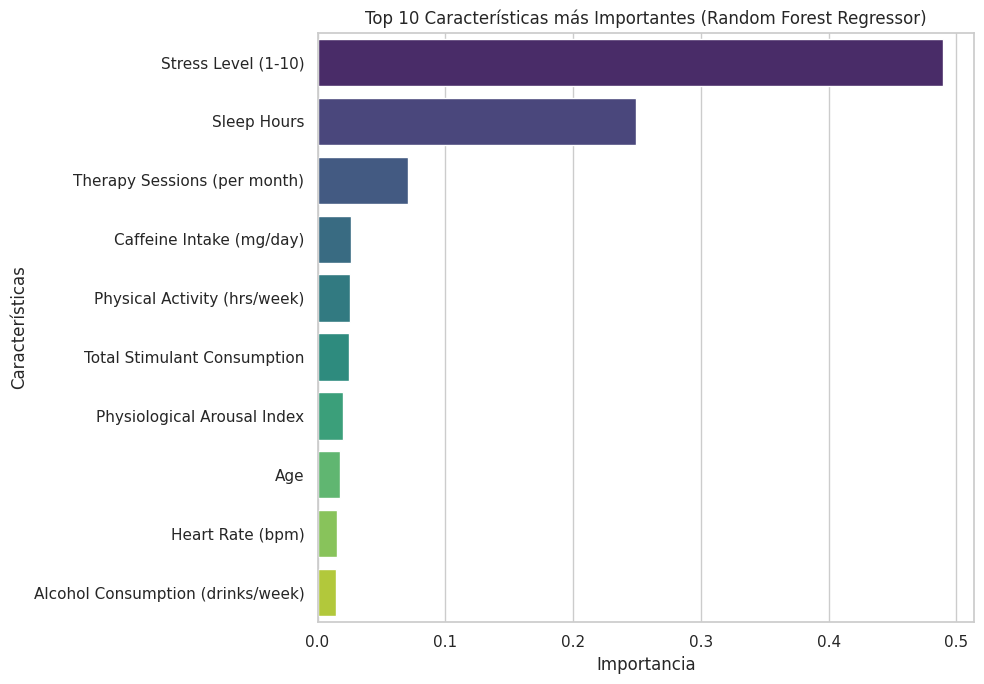

In [ ]:
# Obtener los nombres de las columnas después del preprocesamiento
preprocessor = model_pipeline.named_steps['preprocessor']
# Esto obtiene nombres de columnas después de OneHotEncoding
encoded_feature_names = []

# Recorremos cada transformador del ColumnTransformer
for name, transformer, cols in preprocessor.transformers_:
    if name == 'cat':
        encoder = transformer
        encoded_cols = encoder.get_feature_names_out(cols)
        encoded_feature_names.extend(encoded_cols)
    elif name == 'num':
        encoded_feature_names.extend(cols)
    elif name == 'remainder' and transformer == 'passthrough':
        # Si pasaste columnas sin transformar
        remainder_cols = [col for col in X_train.columns if col not in sum([c if isinstance(c, list) else [c] for _, _, c in preprocessor.transformers if c != 'drop'], [])]
        encoded_feature_names.extend(remainder_cols)

# Ahora ya tenemos todos los nombres reales de las features
regressor_model = model_pipeline.named_steps['regressor']
importances = regressor_model.feature_importances_

# Crear el DataFrame con las importancias
feature_importance_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las más importantes
print("Importancia de las características según Random Forest Regressor:")
print(feature_importance_df.head(10))

# Graficar
plt.figure(figsize=(10, 7))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(10),
    palette='viridis'
)
plt.title('Top 10 Características más Importantes (Random Forest Regressor)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

**Observación:** Las características más relevantes al momento de predecir el Nivel de Ansiedad de una persona son el Nivel de Estrés, las Horas de Sueño y las Sesiones Mensuales de Terapia. Mientra que las características menos relevantes para ello son la Edad, el Ritmo Cardíaco y el Consumo de Alcohol.

## **12. Conclusiones**

In [ ]:
print("Resumen de Resultados del Modelo de Regresión:")
print(f"- Error Absoluto Medio (MAE): {mae:.4f}")
print(f"- Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"- Coeficiente de Determinación (R²): {r2:.4f}")
print("- Las características más importantes fueron: " + ", ".join(feature_importance_df['Feature'].head(3).tolist()) + ".")

Resumen de Resultados del Modelo de Regresión:
- Error Absoluto Medio (MAE): 0.9441
- Raíz del Error Cuadrático Medio (RMSE): 1.1703
- Coeficiente de Determinación (R²): 0.7376
- Las características más importantes fueron: Stress Level (1-10), Sleep Hours, Therapy Sessions (per month).


**NOTA:** Este último punto trasmite que el Nivel de Estrés, las Horas de Sueño y las Sesiones Mensuales de Terapia son las características más relevantes al momento de predecir el Nivel de Ansiedad de una persona.

**Validación de la Hipótesis:**

La hipótesis alternativa (H1) planteaba que era posible predecir el valor mediano de las viviendas con un R² idealmente mayor a 0.5 o 0.6 y un MAE razonablemente bajo.


In [ ]:
print(f"Se obtuvo un R² de {r2:.2f} y un MAE de {mae:.2f}")

if r2 > 0.5: # Umbral de ejemplo para R²
    print("POR LO TANTO, la Hipótesis Alternativa (H1) es soportada por los resultados. El modelo explica una porción considerable de la varianza y es significativamente mejor que un modelo base")
    print("De la misma forma, se rechaza la Hipótesis Nula (H0).")
else:
    print("POR LO TANTO, la Hipótesis alternativa (H1) no es completamente soportada por los resultados, o el modelo tiene un rendimiento bajo (R² <= 0.5).")
    print("Se podría necesitar mejorar el modelo, realizar más ingeniería de características o considerar si las características actuales son suficientes.")

Se obtuvo un R² de 0.74 y un MAE de 0.94
POR LO TANTO, la Hipótesis Alternativa (H1) es soportada por los resultados. El modelo explica una porción considerable de la varianza y es significativamente mejor que un modelo base
De la misma forma, se rechaza la Hipótesis Nula (H0).
